Using ONE of the following sources, complete the questions for only that source. 

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since its not binary like the others, but if you really want to master these concepts, you should pick this one. 

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from xgboost import XGBRegressor




In [185]:
column_list = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_df = pd.read_table("abalone.data",sep=",",header=None,names=column_list)
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Preprocessing options: 
    
Cleaning up column names for use and make sure data types are consistent. -  had to add the column names. 

Dealing with null values. Deleting columns with too many missing values. Replacing null values with column mean or deleting rows. - no missing values

Deleting columns that are redundant and or highly correlated with Rings. I don't see any that are super highly correlated with Rings so we aren't going to remove any, at least on the first go. There are some that are highly correlated to each other so that might be something to tweak if we don't get great results. 

Remove outliers. Outliers removed. 

Standardize all numeric columns.

Perform one-hot encoding or label encoding to turn categorical columns into numeric values (recoding the data). One hot encoded the sex category. Was on the fence about getting rid of it vs label encode vs one hot encode. We'll see how it does. 

The documentation says that the age is rings +1.5. Instead of adding the age and dropping the rings since they'll be correlated, I'm just going to leave as is. We'll predict rings and then be able to add 1.5 later. 

In [186]:
abalone_df.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [187]:
#no missing values
abalone_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [188]:

#how many of each number of rings. 
abalone_df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [189]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [190]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [191]:
abalone_df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [192]:
# one hot encode sex

abalone_df = pd.get_dummies(abalone_df)
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [193]:
# min height was zero in the describe. Ony two have 0 as height but 
# that seems like bad data so they're being tossed. 
abalone_df[abalone_df.Height == 0]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
1257,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,0,1,0
3996,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,0,1,0


In [194]:
abalone_df = abalone_df[abalone_df.Height != 0]

In [195]:
abalone_df[abalone_df.Height == 0]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M


In [196]:
# There are some pretty significan outliers here. We're going to get 
#rid of some 

abalone_df['Rings'].value_counts().sort_index()


1       1
2       1
3      15
4      57
5     115
6     258
7     391
8     567
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [197]:

abalone_df = abalone_df[(abalone_df['Rings'] < 21) & (abalone_df['Rings']>3)]
abalone_df['Rings'].value_counts().sort_index()


4      57
5     115
6     258
7     391
8     567
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
Name: Rings, dtype: int64

<AxesSubplot:>

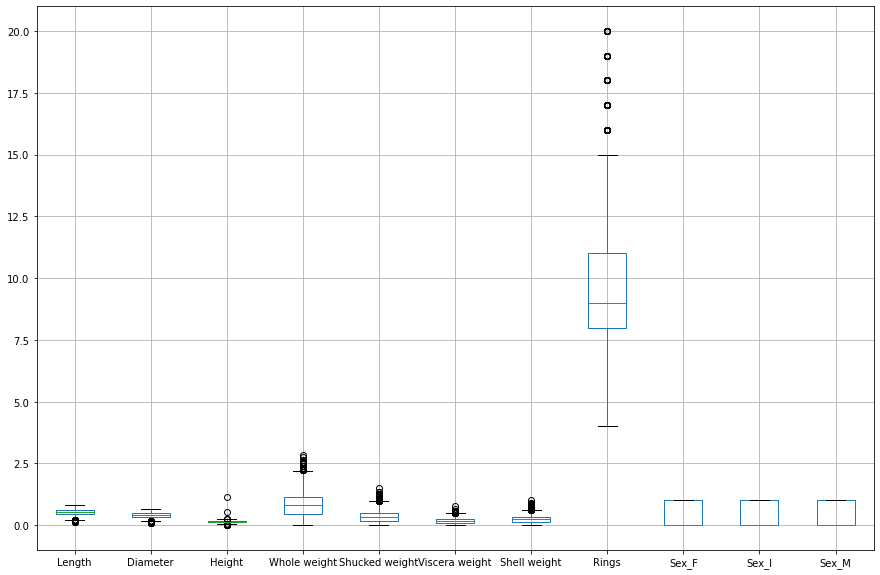

In [198]:
abalone_df.boxplot(figsize=(15,10))


In [199]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000,4122.000000
mean,0.524756,0.408445,0.139645,0.828243,0.360152,0.180756,0.238005,9.853469,0.312227,0.321446,0.366327
std,0.118126,0.097687,0.041225,0.486973,0.221491,0.109145,0.137191,2.978101,0.463458,0.467088,0.481859
min,0.130000,0.095000,0.015000,0.010500,0.005000,0.000500,0.003500,4.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.443125,0.187000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799250,0.336000,0.171000,0.231500,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.150000,0.502750,0.252500,0.325000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,20.000000,1.000000,1.000000,1.000000


In [200]:
out_abalone=abalone_df.copy()
Q1 = out_abalone.quantile(0.25)
Q3 = out_abalone.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
abalone_df = out_abalone[~((out_abalone < (Q1 - 2.5 * IQR)) |(out_abalone > (Q3 + 2.5 * IQR))).any(axis=1)]
abalone_df.shape

Length            0.165000
Diameter          0.130000
Height            0.050000
Whole weight      0.706875
Shucked weight    0.315750
Viscera weight    0.159000
Shell weight      0.195000
Rings             3.000000
Sex_F             1.000000
Sex_I             1.000000
Sex_M             1.000000
dtype: float64


(4055, 11)

In [201]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000
mean,0.523312,0.407148,0.138689,0.819918,0.357541,0.179220,0.234865,9.708015,0.309494,0.325771,0.364735
std,0.118167,0.097586,0.037605,0.481740,0.219576,0.108199,0.134258,2.760113,0.462342,0.468720,0.481415
min,0.130000,0.095000,0.015000,0.010500,0.005000,0.000500,0.003500,4.000000,0.000000,0.000000,0.000000
25%,0.450000,0.345000,0.115000,0.440000,0.184750,0.092500,0.129750,8.000000,0.000000,0.000000,0.000000
50%,0.540000,0.420000,0.140000,0.790500,0.334000,0.169000,0.229500,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.143500,0.500500,0.250500,0.322000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,0.250000,2.555000,1.253000,0.641500,0.797500,18.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

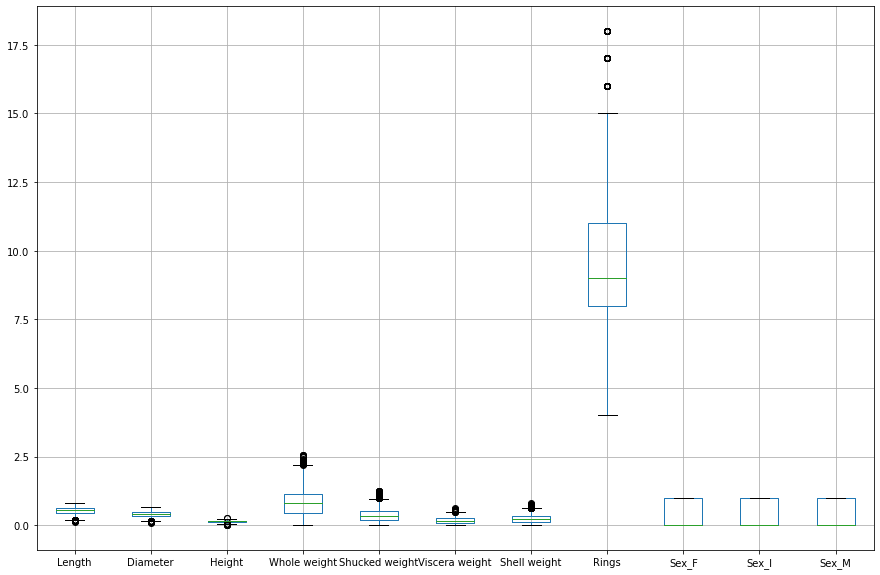

In [202]:
abalone_df.boxplot(figsize=(15,10))


In [203]:
abalone_df.corr()['Rings'].sort_values()


Sex_I            -0.455177
Sex_M             0.199719
Sex_F             0.253498
Shucked weight    0.448690
Viscera weight    0.528758
Whole weight      0.552436
Length            0.579154
Diameter          0.597128
Height            0.622344
Shell weight      0.627170
Rings             1.000000
Name: Rings, dtype: float64

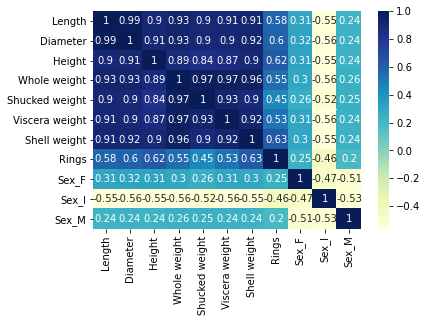

In [204]:
lation = abalone_df.corr()
sn.heatmap(lation, annot=True, cmap="YlGnBu")
plt.show()

In [205]:
abalone_df.dtypes


Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In [206]:
abalone_df['Sex_M']=abalone_df['Sex_M'].astype('int64')
abalone_df['Sex_F']=abalone_df['Sex_F'].astype('int64')
abalone_df['Sex_I']=abalone_df['Sex_I'].astype('int64')

<ipython-input-206-bdbf2c191477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_df['Sex_M']=abalone_df['Sex_M'].astype('int64')
<ipython-input-206-bdbf2c191477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_df['Sex_F']=abalone_df['Sex_F'].astype('int64')
<ipython-input-206-bdbf2c191477>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [207]:
abalone_df.dtypes


Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_F               int64
Sex_I               int64
Sex_M               int64
dtype: object

2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

First one is with no tuning. Ideally I would have liked to document every single little tuning but that would have taken up a lot of space. I probably could have done some looping through the different parameters but even one loop per parameter would have given you all a ton to look at. dtr2 is the result of changing up the max depth, min sample leaf, and rejecting anything other than the default for min weight fraction leaf, min sample split, and splitter beacuse everything I did with those made the RMSE go up. 

In [208]:



X = abalone_df.drop('Rings', axis =1)
y = abalone_df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=27)

dtr = DecisionTreeRegressor(random_state=27)

dtr = dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)


mse_score = MSE(y_test, y_pred)
rmse = mse_score**(1/2)
print('No parameters tuned RMSE: {:.3f}'.format(rmse))


No parameters tuned RMSE: 2.629


In [209]:
dtr2 = DecisionTreeRegressor(max_depth = 5, min_samples_leaf =50, random_state=27)

dtr2 = dtr2.fit(X_train, y_train)
y_pred = dtr2.predict(X_test)


mse_score2 = MSE(y_test, y_pred)
rmse2 = mse_score2**(1/2)
print('parameters tuned RMSE: {:.3f}'.format(rmse2))


parameters tuned RMSE: 1.967


3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.


Similar to the previous question. The no parameter attempt is first. The second is the result of much fine tuning. min_weight_fraction_leaf was the only one I tried that made it worse with meddling.  

 class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]¶

In [210]:
rf = RandomForestRegressor()

rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse_rf_score = MSE(y_test,y_pred)
rmse_rf_score = mse_rf_score **(1/2)


print('No parameters tuned RMSE: {:.3f}'.format(rmse_rf_score))


No parameters tuned RMSE: 1.852


In [211]:
rf2 = RandomForestRegressor(max_depth = 11, n_estimators=500, max_leaf_nodes= 150, min_samples_leaf = 1, min_samples_split = 5, random_state =27)

rf2 = rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)

mse_rf2_score = MSE(y_test,y_pred)
rmse_rf2_score = mse_rf2_score **(1/2)


print('parameters tuned RMSE: {:.3f}'.format(rmse_rf2_score))


parameters tuned RMSE: 1.830


4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

Similar to the other two, I have my default parameter one and tuned parameter one. I'm a little disappointed in it. I tried a whole bunch of things but either there was no change or it got worse. I thought this was supposed to be a really good one. I can only assume it is user error. 



learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

   max_depth: determines how deeply each tree is allowed to grow during any boosting round.
    
   subsample: percentage of samples used per tree. Low value can lead to underfitting.
   
   colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
    
   n_estimators: number of trees you want to build.
    
   objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.


In [212]:
xgbr = XGBRegressor()

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
mse_xgbr_score = MSE(y_test,y_pred)
rmse_xgbr_score = mse_xgbr_score **(1/2)

print('No parameters tuned RMSE: {:.3f}'.format(rmse_xgbr_score))


No parameters tuned RMSE: 1.941


In [213]:
xgbr2 = XGBRegressor(n_estimators=500,max_depth=1,random_state=27)

xgbr2.fit(X_train, y_train)

y_pred = xgbr2.predict(X_test)
mse_xgbr2_score = MSE(y_test,y_pred)
rmse_xgbr2_score = mse_xgbr2_score **(1/2)

print('Parameters tuned RMSE: {:.3f}'.format(rmse_xgbr2_score))


Parameters tuned RMSE: 1.910


5.	Which model performed best? What is your performance metric? Why? 

In [214]:
print('Tree: {:.3f}'.format(rmse2))

print('Forest: {:.3f}'.format(rmse_rf2_score))
print('XGBoost: {:.3f}'.format(rmse_xgbr2_score)) 

Tree: 1.967
Forest: 1.830
XGBoost: 1.910


My best one was the forest. I used RMSE because that seems to be the one we use most in class for regressive models and it was what DataCamp used so I trust it is the right choice for this. 